Notebook Setup
---

In [76]:
import os
import sys

In [77]:
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
%matplotlib inline

**Tasks:**

1. Generate a random Maze with size (7,7) as a Numpy matrix, which includes 25% of occupied cells (walls).
2. Build the Maze state space.
3. Develop a transition model according to the following:
* The Rat-Agent is allowed to move only on free cells by using the following actions: *left, up, right, down*.
* Since the Maze is 7-story building different actions have different costs: left/right: -2 (from Agent's performance); down:-1; up:-4.
4. Implement 2 Rat-Agents (based on Uniform-cost  and BreadthFirst Search algoritms) and apply them (separately) to find out which one is more productive for getting cheese (which Agent spends less peformance to get cheese).
* for Uniform-cost Search apply BEST-FIRST-SEARCH
with PATH-COST as the evaluation function
* PATH-COST is the total cost of the path from the initial state to the node if actions costs are: left/right: 2 (if the action 'left'/'right' is applied to get the child-node from parent-node);down:1; up:4.
5. Visualize the 2 search trees accordingly.
6. Let's assume that the Rat-Agent (being in the initial state [0,0]) figured out (probably he could smell it) that the cheese is at the top of the Maze.
* place the cheese in random cell but above 4th level (row) of the Maze
* implement 2 search programs (based on Depth-first and Depth-limited strategies) for 2 to Rat-Agents and determine which Agent (DFS-based or DLS-base) will find the cheese faster (assuming that one move in the Maze takes 1 sec.)



Tasks 1-4
---

Generating the maze

In [79]:
from myMazeData import makeMaze

n = 7
a = makeMaze(n) # Can take a second optional argument (see myMazeData.py) that defines the percentage of occupied walls. Default is 0.25 (25%). 
a

array([[1, 1, 1, 1, 0, 0, 1],
       [0, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 1],
       [0, 1, 1, 1, 0, 1, 1],
       [0, 1, 0, 1, 0, 0, 1],
       [1, 0, 0, 0, 0, 1, 1],
       [1, 1, 1, 0, 1, 1, 1]])

Building the maze state space

In [80]:
from myMazeData import mazeStatesLocations

mazeStateSpace = mazeStatesLocations(n)
mazeStateSpace

{(0, 0): (8, 5),
 (0, 1): (5, 5),
 (0, 2): (4, 4),
 (0, 3): (3, 3),
 (0, 4): (6, 4),
 (0, 5): (7, 8),
 (0, 6): (7, 1),
 (1, 0): (7, 5),
 (1, 1): (4, 0),
 (1, 2): (4, 3),
 (1, 3): (1, 5),
 (1, 4): (4, 0),
 (1, 5): (4, 8),
 (1, 6): (2, 6),
 (2, 0): (5, 2),
 (2, 1): (0, 2),
 (2, 2): (5, 5),
 (2, 3): (7, 1),
 (2, 4): (6, 3),
 (2, 5): (0, 1),
 (2, 6): (1, 5),
 (3, 0): (4, 0),
 (3, 1): (8, 1),
 (3, 2): (0, 3),
 (3, 3): (5, 0),
 (3, 4): (3, 8),
 (3, 5): (3, 1),
 (3, 6): (1, 1),
 (4, 0): (5, 3),
 (4, 1): (0, 4),
 (4, 2): (0, 7),
 (4, 3): (1, 4),
 (4, 4): (4, 1),
 (4, 5): (7, 5),
 (4, 6): (8, 5),
 (5, 0): (8, 8),
 (5, 1): (3, 6),
 (5, 2): (1, 2),
 (5, 3): (8, 4),
 (5, 4): (5, 1),
 (5, 5): (8, 2),
 (5, 6): (4, 4),
 (6, 0): (4, 4),
 (6, 1): (8, 2),
 (6, 2): (1, 8),
 (6, 3): (8, 0),
 (6, 4): (5, 8),
 (6, 5): (0, 3),
 (6, 6): (2, 2)}

Developing the transitional model

In [81]:
from myMazeData import defineMazeAvailableActions

mazeActions = defineMazeAvailableActions(a)
mazeActions

{(0, 0): ['right'],
 (0, 1): ['left', 'right', 'down'],
 (0, 2): ['left', 'right', 'down'],
 (0, 3): ['left', 'down'],
 (0, 4): [],
 (0, 5): [],
 (0, 6): [],
 (1, 0): [],
 (1, 1): ['up', 'right', 'down'],
 (1, 2): ['left', 'up', 'right'],
 (1, 3): ['left', 'up', 'down'],
 (1, 4): [],
 (1, 5): [],
 (1, 6): [],
 (2, 0): ['right'],
 (2, 1): ['left', 'up', 'down'],
 (2, 2): [],
 (2, 3): ['up', 'down'],
 (2, 4): [],
 (2, 5): ['right', 'down'],
 (2, 6): ['left', 'down'],
 (3, 0): [],
 (3, 1): ['up', 'right', 'down'],
 (3, 2): ['left', 'right'],
 (3, 3): ['left', 'up', 'down'],
 (3, 4): [],
 (3, 5): ['up', 'right'],
 (3, 6): ['left', 'up', 'down'],
 (4, 0): [],
 (4, 1): ['up'],
 (4, 2): [],
 (4, 3): ['up'],
 (4, 4): [],
 (4, 5): [],
 (4, 6): ['up', 'down'],
 (5, 0): ['down'],
 (5, 1): [],
 (5, 2): [],
 (5, 3): [],
 (5, 4): [],
 (5, 5): ['right', 'down'],
 (5, 6): ['left', 'up', 'down'],
 (6, 0): ['up', 'right'],
 (6, 1): ['left', 'right'],
 (6, 2): ['left'],
 (6, 3): [],
 (6, 4): ['right'],
 

In [82]:
from myMazeData import makeMazeTransformationModel

maze = makeMazeTransformationModel(mazeActions)
maze

{(0, 0): {'right': (0, 1)},
 (0, 1): {'left': (0, 0), 'right': (0, 2), 'down': (1, 1)},
 (0, 2): {'left': (0, 1), 'right': (0, 3), 'down': (1, 2)},
 (0, 3): {'left': (0, 2), 'down': (1, 3)},
 (0, 4): {},
 (0, 5): {},
 (0, 6): {},
 (1, 0): {},
 (1, 1): {'up': (0, 1), 'right': (1, 2), 'down': (2, 1)},
 (1, 2): {'left': (1, 1), 'up': (0, 2), 'right': (1, 3)},
 (1, 3): {'left': (1, 2), 'up': (0, 3), 'down': (2, 3)},
 (1, 4): {},
 (1, 5): {},
 (1, 6): {},
 (2, 0): {'right': (2, 1)},
 (2, 1): {'left': (2, 0), 'up': (1, 1), 'down': (3, 1)},
 (2, 2): {},
 (2, 3): {'up': (1, 3), 'down': (3, 3)},
 (2, 4): {},
 (2, 5): {'right': (2, 6), 'down': (3, 5)},
 (2, 6): {'left': (2, 5), 'down': (3, 6)},
 (3, 0): {},
 (3, 1): {'up': (2, 1), 'right': (3, 2), 'down': (4, 1)},
 (3, 2): {'left': (3, 1), 'right': (3, 3)},
 (3, 3): {'left': (3, 2), 'up': (2, 3), 'down': (4, 3)},
 (3, 4): {},
 (3, 5): {'up': (2, 5), 'right': (3, 6)},
 (3, 6): {'left': (3, 5), 'up': (2, 6), 'down': (4, 6)},
 (4, 0): {},
 (4, 1): 

In [83]:
from myMazeGraphClass import mazeGraph

mazeWorldGraph = mazeGraph(maze,mazeStateSpace)
mazeWorldGraph.graph_dict

{(0, 0): {'right': (0, 1)},
 (0, 1): {'left': (0, 0), 'right': (0, 2), 'down': (1, 1)},
 (0, 2): {'left': (0, 1), 'right': (0, 3), 'down': (1, 2)},
 (0, 3): {'left': (0, 2), 'down': (1, 3)},
 (0, 4): {},
 (0, 5): {},
 (0, 6): {},
 (1, 0): {},
 (1, 1): {'up': (0, 1), 'right': (1, 2), 'down': (2, 1)},
 (1, 2): {'left': (1, 1), 'up': (0, 2), 'right': (1, 3)},
 (1, 3): {'left': (1, 2), 'up': (0, 3), 'down': (2, 3)},
 (1, 4): {},
 (1, 5): {},
 (1, 6): {},
 (2, 0): {'right': (2, 1)},
 (2, 1): {'left': (2, 0), 'up': (1, 1), 'down': (3, 1)},
 (2, 2): {},
 (2, 3): {'up': (1, 3), 'down': (3, 3)},
 (2, 4): {},
 (2, 5): {'right': (2, 6), 'down': (3, 5)},
 (2, 6): {'left': (2, 5), 'down': (3, 6)},
 (3, 0): {},
 (3, 1): {'up': (2, 1), 'right': (3, 2), 'down': (4, 1)},
 (3, 2): {'left': (3, 1), 'right': (3, 3)},
 (3, 3): {'left': (3, 2), 'up': (2, 3), 'down': (4, 3)},
 (3, 4): {},
 (3, 5): {'up': (2, 5), 'right': (3, 6)},
 (3, 6): {'left': (3, 5), 'up': (2, 6), 'down': (4, 6)},
 (4, 0): {},
 (4, 1): 

In [84]:
mazeWorldGraph.g

{(0, 0): {(0, 1): 2},
 (0, 1): {(0, 0): 2, (0, 2): 2, (1, 1): 1},
 (0, 2): {(0, 1): 2, (0, 3): 2, (1, 2): 1},
 (0, 3): {(0, 2): 2, (1, 3): 1},
 (1, 1): {(0, 1): 4, (1, 2): 2, (2, 1): 1},
 (1, 2): {(1, 1): 2, (0, 2): 4, (1, 3): 2},
 (1, 3): {(1, 2): 2, (0, 3): 4, (2, 3): 1},
 (2, 0): {(2, 1): 2},
 (2, 1): {(2, 0): 2, (1, 1): 4, (3, 1): 1},
 (2, 3): {(1, 3): 4, (3, 3): 1},
 (2, 5): {(2, 6): 2, (3, 5): 1},
 (2, 6): {(2, 5): 2, (3, 6): 1},
 (3, 1): {(2, 1): 4, (3, 2): 2, (4, 1): 1},
 (3, 2): {(3, 1): 2, (3, 3): 2},
 (3, 3): {(3, 2): 2, (2, 3): 4, (4, 3): 1},
 (3, 5): {(2, 5): 4, (3, 6): 2},
 (3, 6): {(3, 5): 2, (2, 6): 4, (4, 6): 1},
 (4, 1): {(3, 1): 4},
 (4, 3): {(3, 3): 4},
 (4, 6): {(3, 6): 4, (5, 6): 1},
 (5, 0): {(6, 0): 1},
 (5, 5): {(5, 6): 2, (6, 5): 1},
 (5, 6): {(5, 5): 2, (4, 6): 4, (6, 6): 1},
 (6, 0): {(5, 0): 4, (6, 1): 2},
 (6, 1): {(6, 0): 2, (6, 2): 2},
 (6, 2): {(6, 1): 2},
 (6, 4): {(6, 5): 2},
 (6, 5): {(6, 4): 2, (5, 5): 4, (6, 6): 2},
 (6, 6): {(6, 5): 2, (5, 6): 4}}

In [85]:
mazeWorldGraph.nodes()

[(4, 0),
 (5, 4),
 (4, 6),
 (5, 1),
 (0, 5),
 (2, 2),
 (1, 0),
 (6, 2),
 (4, 2),
 (3, 0),
 (5, 6),
 (3, 6),
 (5, 3),
 (2, 4),
 (1, 2),
 (0, 4),
 (2, 1),
 (6, 4),
 (3, 2),
 (4, 1),
 (5, 5),
 (0, 0),
 (1, 4),
 (0, 6),
 (2, 3),
 (6, 6),
 (6, 3),
 (3, 4),
 (4, 3),
 (3, 1),
 (0, 2),
 (1, 6),
 (2, 5),
 (1, 3),
 (6, 5),
 (4, 5),
 (3, 3),
 (5, 0),
 (0, 1),
 (1, 5),
 (6, 1),
 (3, 5),
 (5, 2),
 (4, 4),
 (1, 1),
 (0, 3),
 (2, 0),
 (2, 6),
 (6, 0)]

In [86]:
# Task 4

from agents import ProblemSolvingMazeAgentBREADTH_FS, ProblemSolvingMazeAgentBFS
from mazeGraphClass import mazeGraph
from mazeProblemClass import MazeProblem
from myMazeData import makeMaze, defineMazeActions, defineMazeAvailableActions, makeMazeTransformationModel

# Create the maze graph
n = 7
a = makeMaze(n)
mazeActs = defineMazeActions(a)
#mazeActs = defineMazeAvailableActions(a)
maze = makeMazeTransformationModel(mazeActs)
maze_graph = mazeGraph(maze)

# Define initial and goal states
initial_state = (0, 0)
goal_state = (6, 6)  # Assuming the cheese is at the bottom-right corner

# Create the problem
maze_problem = MazeProblem(initial_state, goal_state, maze_graph)

# Create and run the UCS agent
ucs_agent = ProblemSolvingMazeAgentBFS(initial_state, maze_graph, goal_state)
ucs_solution = ucs_agent.search(maze_problem)

# Create and run the BFS agent
bfs_agent = ProblemSolvingMazeAgentBREADTH_FS(initial_state, maze_graph, goal_state)
bfs_solution = bfs_agent.search(maze_problem)

'''
# Compare the performance
if ucs_solution and bfs_solution:
    ucs_cost = sum(maze_problem.path_cost(0, ucs_solution[i], ucs_solution[i+1], ucs_solution[i+2]) 
                   for i in range(0, len(ucs_solution) - 2, 2))
    bfs_cost = sum(maze_problem.path_cost(0, bfs_solution[i], bfs_solution[i+1], bfs_solution[i+2]) 
                   for i in range(0, len(bfs_solution) - 2, 2))
    
    print(f"UCS path cost: {ucs_cost}")
    print(f"BFS path cost: {bfs_cost}")
    
    if ucs_cost < bfs_cost:
        print("Uniform-cost Search agent is more productive (spends less performance).")
    elif bfs_cost < ucs_cost:
        print("Breadth-First Search agent is more productive (spends less performance).")
    else:
        print("Both agents have the same performance.")
else:
    print("One or both agents failed to find a solution.")
'''

The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
The child node <Node (1, 0)>.
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
The child node <Node (1, 1)>.
The node (0, 2) is extracted from frontier:
The child node <Node (0, 3)>.
The child node <Node (1, 2)>.
The node (0, 3) is extracted from frontier:
The child node <Node (0, 4)>.
The child node <Node (1, 3)>.
The node (0, 4) is extracted from frontier:
The child node <Node (0, 5)>.
The child node <Node (1, 4)>.
The node (0, 5) is extracted from frontier:
The child node <Node (0, 6)>.
The child node <Node (1, 5)>.
The node (0, 6) is extracted from frontier:
The child node <Node (1, 6)>.
The node (1, 0) is extracted from frontier:
The child node <Node (2, 0)>.
The node (1, 1) is extracted from frontier:
The child node <Node (2, 1)>.
The node (1, 2) is extracted from frontier:
The child node <Node (2, 2)>.
The node (1, 3) is extracted from frontier:
The child node <Node (2, 3)>.
The no

'\n# Compare the performance\nif ucs_solution and bfs_solution:\n    ucs_cost = sum(maze_problem.path_cost(0, ucs_solution[i], ucs_solution[i+1], ucs_solution[i+2]) \n                   for i in range(0, len(ucs_solution) - 2, 2))\n    bfs_cost = sum(maze_problem.path_cost(0, bfs_solution[i], bfs_solution[i+1], bfs_solution[i+2]) \n                   for i in range(0, len(bfs_solution) - 2, 2))\n    \n    print(f"UCS path cost: {ucs_cost}")\n    print(f"BFS path cost: {bfs_cost}")\n    \n    if ucs_cost < bfs_cost:\n        print("Uniform-cost Search agent is more productive (spends less performance).")\n    elif bfs_cost < ucs_cost:\n        print("Breadth-First Search agent is more productive (spends less performance).")\n    else:\n        print("Both agents have the same performance.")\nelse:\n    print("One or both agents failed to find a solution.")\n'

In [87]:
# REVISED
if ucs_solution and bfs_solution:
    ucs_cost = sum(maze_problem.path_cost(0, 'A', ucs_solution[i], 'B') 
                   for i in range(0, len(ucs_solution)))
    bfs_cost = sum(maze_problem.path_cost(0, 'A', bfs_solution[i], 'B') 
                   for i in range(0, len(bfs_solution)))
    
    print(f"UCS path cost: {ucs_cost}")
    print(f"BFS path cost: {bfs_cost}")
    
    if ucs_cost < bfs_cost:
        print("Uniform-cost Search agent is more productive (spends less performance).")
    elif bfs_cost < ucs_cost:
        print("Breadth-First Search agent is more productive (spends less performance).")
    else:
        print("Both agents have the same performance.")
else:
    print("One or both agents failed to find a solution.")

UCS path cost: 18
BFS path cost: 18
Both agents have the same performance.


Task 5
---

The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
The child node <Node (1, 0)>.
The node (0, 1) is extracted from frontier:
The child node <Node (0, 2)>.
The child node <Node (1, 1)>.
The node (0, 2) is extracted from frontier:
The child node <Node (0, 3)>.
The child node <Node (1, 2)>.
The node (0, 3) is extracted from frontier:
The child node <Node (0, 4)>.
The child node <Node (1, 3)>.
The node (0, 4) is extracted from frontier:
The child node <Node (0, 5)>.
The child node <Node (1, 4)>.
The node (0, 5) is extracted from frontier:
The child node <Node (0, 6)>.
The child node <Node (1, 5)>.
The node (0, 6) is extracted from frontier:
The child node <Node (1, 6)>.
The node (1, 0) is extracted from frontier:
The child node <Node (2, 0)>.
The node (1, 1) is extracted from frontier:
The child node <Node (2, 1)>.
The node (1, 2) is extracted from frontier:
The child node <Node (2, 2)>.
The node (1, 3) is extracted from frontier:
The child node <Node (2, 3)>.
The no

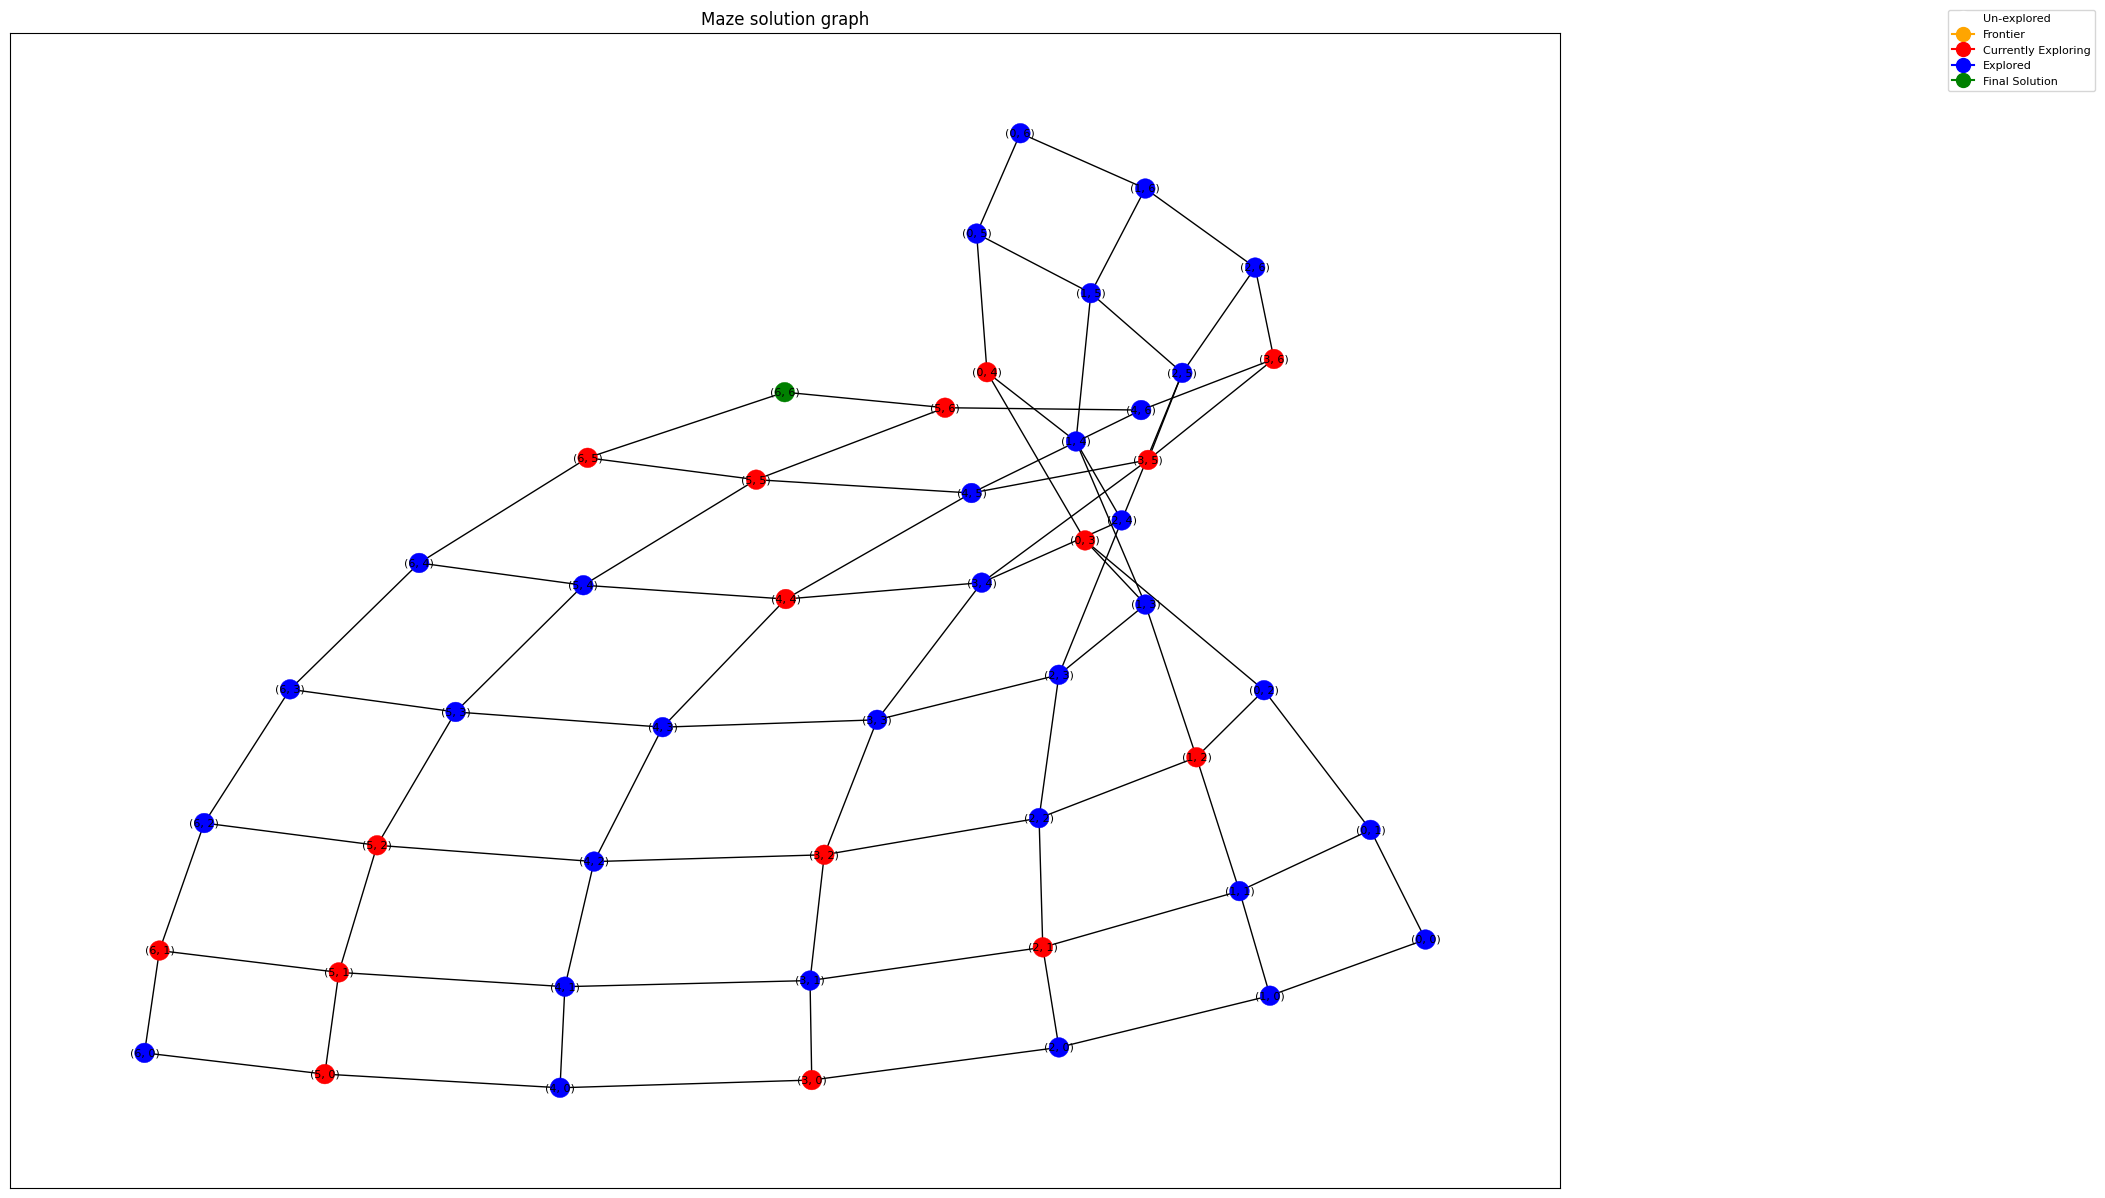

In [88]:
from agents import ProblemSolvingMazeAgentBFSShow
from visualizations import drawSearchTree

# Create and run the UCS agent
ucs_agent = ProblemSolvingMazeAgentBFSShow(initial_state, maze_graph, goal_state)
ucs_solution_colors = ucs_agent.work(initial_state)

drawSearchTree(maze_graph, a, ucs_solution_colors)

The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
The child node <Node (1, 0)>.
The node (0, 1) is extracted from frontier:
The child node <Node (0, 0)>.
The child node <Node (0, 2)>.
The child node <Node (1, 1)>.
The node (1, 0) is extracted from frontier:
The child node <Node (0, 0)>.
The child node <Node (1, 1)>.
The child node <Node (2, 0)>.
The node (0, 2) is extracted from frontier:
The child node <Node (0, 1)>.
The child node <Node (0, 3)>.
The child node <Node (1, 2)>.
The node (1, 1) is extracted from frontier:
The child node <Node (1, 0)>.
The child node <Node (0, 1)>.
The child node <Node (1, 2)>.
The child node <Node (2, 1)>.
The node (2, 0) is extracted from frontier:
The child node <Node (1, 0)>.
The child node <Node (2, 1)>.
The child node <Node (3, 0)>.
The node (0, 3) is extracted from frontier:
The child node <Node (0, 2)>.
The child node <Node (0, 4)>.
The child node <Node (1, 3)>.
The node (1, 2) is extracted from frontier:
The child node <No

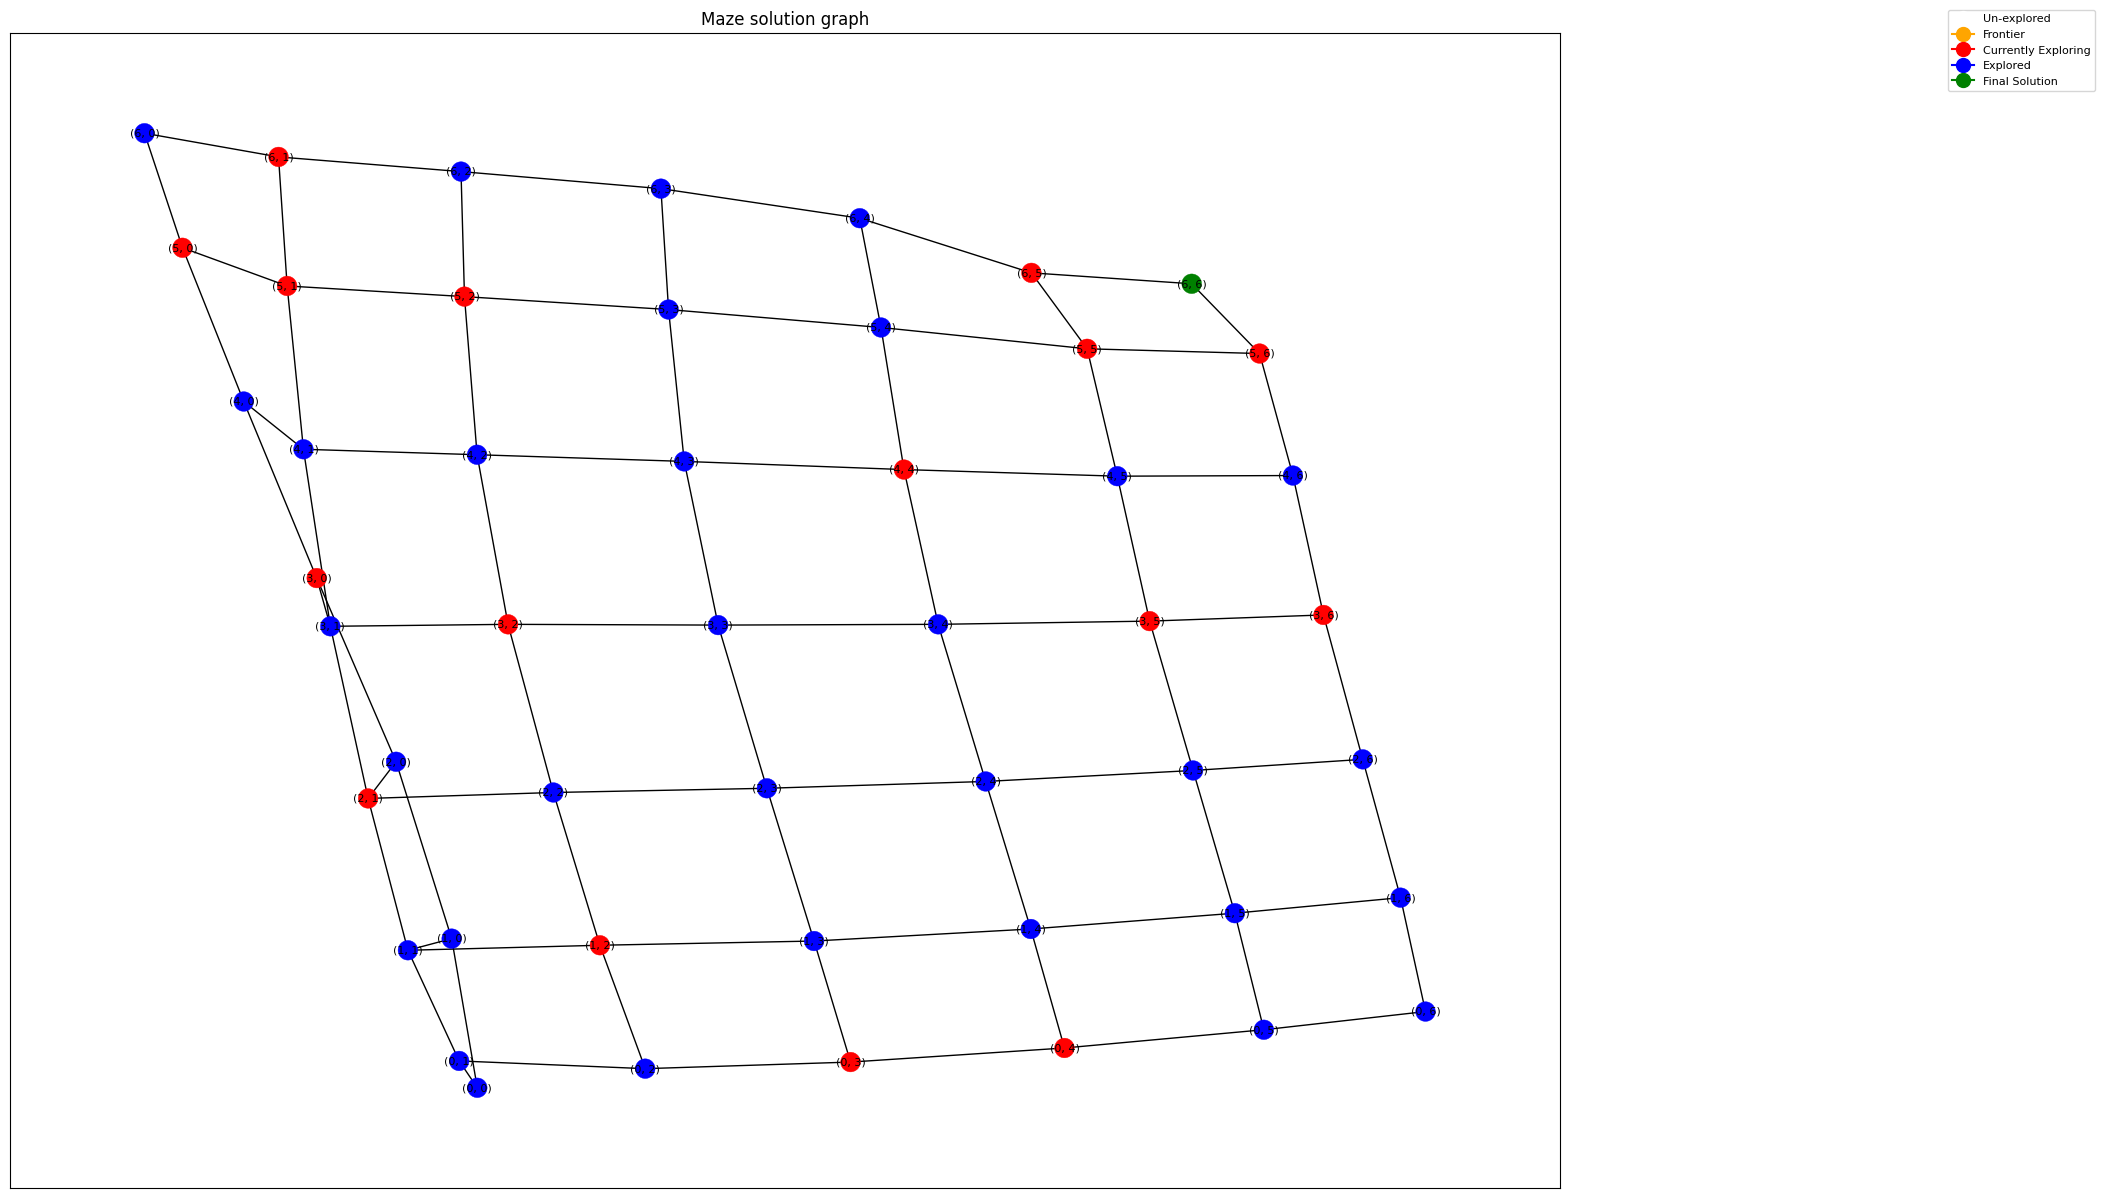

In [89]:
from agents import ProblemSolvingMazeAgentBREADTH_FSShow
from visualizations import drawSearchTree

# Create and run the BFS agent
bfs_agent = ProblemSolvingMazeAgentBREADTH_FSShow(initial_state, maze_graph, goal_state)
bfs_solution_colors = bfs_agent.work(initial_state)

drawSearchTree(maze_graph, a, bfs_solution_colors)

Task 6
---

In [90]:
import random
from agentsPrograms import DepthFirstSearchGraph, LimitedDepthFirstSearchGraph
from agents import ProblemSolvingMazeAgentDFS, ProblemSolvingMazeAgentDLS
from mazeGraphClass import mazeGraph
from MazeProblemTask6 import MazeProblem
from myMazeData import makeMaze, defineMazeAvailableActions, defineMazeActions, makeMazeTransformationModel

# Create the maze graph
n = 7
a = makeMaze(n)
mazeActs = defineMazeActions(a)
#mazeActs = defineMazeAvailableActions(a)
maze = makeMazeTransformationModel(mazeActs)
maze_graph = mazeGraph(maze)

# Define initial state
initial_state = (0, 0)

# Place the cheese in a random cell above the 4th level (row) of the Maze
goal_state = (random.randint(5, 6), random.randint(0, 6))

# Create the problem
maze_problem = MazeProblem(initial_state, goal_state, maze_graph)

# Create and run the DFS agent
dfs_agent = ProblemSolvingMazeAgentDFS(initial_state, maze_graph, goal_state)
dfs_solution = dfs_agent.search(maze_problem)


# Create and run the DLS agent with a limit of 10
limit = 10 # <- change this to alter the depth limit
dls_agent = ProblemSolvingMazeAgentDLS(initial_state, maze_graph, goal_state, limit)
dls_solution = dls_agent.search(maze_problem)

'''
# Compare the performance
if dfs_solution and dls_solution:
    dfs_cost = sum(maze_problem.path_cost(0, dfs_solution[i], dfs_solution[i+1], dfs_solution[i+2]) 
                   for i in range(0, len(dfs_solution) - 2, 2))
    dls_cost = sum(maze_problem.path_cost(0, dls_solution[i], dls_solution[i+1], dls_solution[i+2]) 
                   for i in range(0, len(dls_solution) - 2, 2))
    
    print(f"DFS path cost: {dfs_cost}")
    print(f"DLS path cost: {dls_cost}")
    
    if dfs_cost < dls_cost:
        print("Depth-First Search agent is more productive (spends less performance).")
    elif dls_cost < dfs_cost:
        print("Depth-Limited Search agent is more productive (spends less performance).")
    else:
        print("Both agents have the same performance.")
else:
    print("One or both agents failed to find a solution.")
'''

if dfs_solution and dls_solution:
    dfs_cost = sum(maze_problem.path_cost(0, 'A', dfs_solution[i], 'B') 
                   for i in range(0, len(dfs_solution)))
    dls_cost = sum(maze_problem.path_cost(0, 'A', dls_solution[i], 'B') 
                   for i in range(0, len(dls_solution)))
    
    print(f"DFS path cost: {dfs_cost}")
    print(f"DLS path cost: {dls_cost}")
    
    if dfs_cost < dls_cost:
        print("Depth-First Search agent is more productive (spends less performance).")
    elif dls_cost < dfs_cost:
        print("Depth-Limited Search agent is more productive (spends less performance).")
    else:
        print("Both agents have the same performance.")
else:
    print("One or both agents failed to find a solution.")

Reached: {(0, 0)} 
Frontier: deque([<Node (0, 0)>]) 
The node (0, 0) is extracted from frontier:
The child node <Node (0, 1)>.
The child node <Node (1, 0)>.
Reached: {(0, 1), (1, 0), (0, 0)} 
Frontier: deque([<Node (0, 1)>, <Node (1, 0)>]) 
The node (1, 0) is extracted from frontier:
The child node <Node (0, 0)>.
The child node <Node (1, 1)>.
The child node <Node (2, 0)>.
Reached: {(0, 1), (0, 0), (1, 1), (2, 0), (1, 0)} 
Frontier: deque([<Node (0, 1)>, <Node (1, 1)>, <Node (2, 0)>]) 
The node (2, 0) is extracted from frontier:
The child node <Node (1, 0)>.
The child node <Node (2, 1)>.
The child node <Node (3, 0)>.
Reached: {(0, 1), (2, 1), (0, 0), (1, 1), (2, 0), (3, 0), (1, 0)} 
Frontier: deque([<Node (0, 1)>, <Node (1, 1)>, <Node (2, 1)>, <Node (3, 0)>]) 
The node (3, 0) is extracted from frontier:
The child node <Node (2, 0)>.
The child node <Node (3, 1)>.
The child node <Node (4, 0)>.
Reached: {(0, 1), (4, 0), (2, 1), (0, 0), (3, 1), (1, 1), (2, 0), (3, 0), (1, 0)} 
Frontier: deq